# Resolução AP1

## Importação de libs

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression

## Carregamento do dataset

In [2]:
df = pd.read_csv('breast_cancer_wisconsin_ap1.csv', sep=';')

In [3]:
cols = df.columns
cols.values

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'], dtype=object)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Questão 1 - Atribuição de média a valores faltantes e conversão dos labels para valores numéricos

In [5]:
le = LabelEncoder()

In [6]:
df['label'] = le.fit_transform(df.values[:,-1])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:
df.isna().sum()

mean radius                1
mean texture               0
mean perimeter             1
mean area                  3
mean smoothness            1
mean compactness           2
mean concavity             0
mean concave points        2
mean symmetry              2
mean fractal dimension     4
radius error               2
texture error              2
perimeter error            1
area error                 1
smoothness error           4
compactness error          2
concavity error            2
concave points error       1
symmetry error             1
fractal dimension error    2
worst radius               0
worst texture              0
worst perimeter            2
worst area                 5
worst smoothness           3
worst compactness          1
worst concavity            1
worst concave points       0
worst symmetry             2
worst fractal dimension    2
label                      0
dtype: int64

In [9]:
inp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
data = inp.fit_transform(df)

In [11]:
type(data)

numpy.ndarray

## Questão 2 - Cálculos de correlação e distribuição

In [12]:
df = pd.DataFrame(data, columns=cols)

In [13]:
corr = df.corr()

In [1]:
# esta célula não é necessária para resolver a questão, mas dá uma boa ideia visual das correlações.
#corr.style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)

### a) feature com maior valor absoluto de correlação com o label

In [15]:
corr_max_com_label = corr['label'][:-1].max()
corr_max_com_label

0.7935660171412696

In [16]:
corr[ corr['label'] == corr_max_com_label ].index[0]

'worst concave points'

### b) features com maior valor absoluto de correlação entre si

In [17]:
corr_sem_valor_1 = corr.replace(1, np.nan)
corr_sem_valor_1.max().sort_values(ascending=False).head(2)

mean radius       0.993695
mean perimeter    0.993695
dtype: float64

Desse modo, a máxima correlação de 0.993695 ocorre entre as features 'mean radius' e 'mean perimeter'

### c) Feature que mais parece com uma distribuição gaussiana

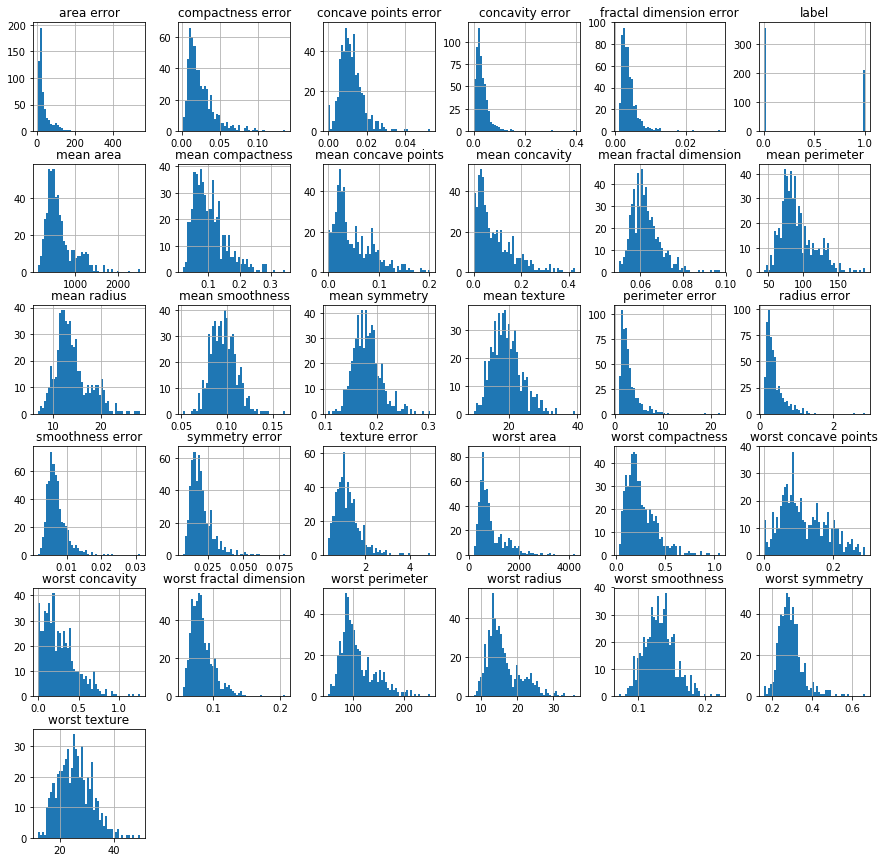

In [18]:
df.hist(figsize=(15,15), bins=50);

Visualmente as features mais parecidas com a forma de sino de uma distribuição gaussiana são **worst smoothness** e **worst texture**. 

A seguir, mostramos mais detalhes dessas duas features (esses detalhes não seriam necessários para resolver a questão):

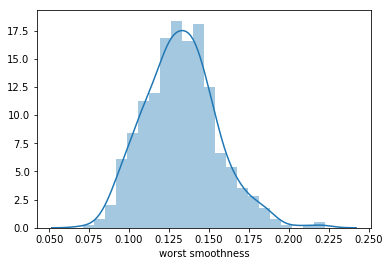

In [19]:
sns.distplot(df['worst smoothness']);

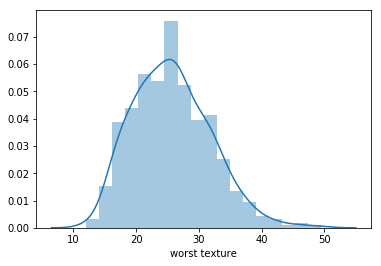

In [20]:
sns.distplot(df['worst texture']);

Pelos gráficos acima, a feature **worst smoothness** parece mais com uma gaussiana com formato de sino e com forma ligeiramente simétrica com relação ao centro (média).

## Questão 3 - Separação de datasets, Standardização e criação e treino de modelos preditivos

In [21]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y, random_state=42 )

In [23]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [24]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [25]:
models = {}
models['Perc'] = Perceptron(max_iter = 1000 , tol = 1e-3)
models['Perc_Std'] = Perceptron(max_iter = 1000 , tol = 1e-3)
models['SGD'] = SGDClassifier(max_iter = 1000 , tol = 1e-3)
models['SGD_Std'] = SGDClassifier(max_iter = 1000 , tol = 1e-3)
models['LogReg'] = LogisticRegression(solver='lbfgs', max_iter=10000)
models['LogReg_Std'] = LogisticRegression(solver='lbfgs', max_iter=10000)

In [26]:
y_pred_train = {}
y_pred = {}

for k in models:
    if k[-3:] == 'Std':
        models[k].fit(X_train_std, y_train)
        y_pred[k] =models[k].predict(X_test_std)
        y_pred_train[k] = models[k].predict(X_train_std)
    else:
        models[k].fit(X_train, y_train)
        y_pred[k] =models[k].predict(X_test)
        y_pred_train[k] = models[k].predict(X_train)

## Questão 4 - Provar que os dados dos conjuntos de dados estão estratificados 

In [27]:
def print_perc_class(y):
    values, counts = np.unique(y, return_counts=True)
    total_size = y.shape[0]
    for i in range(values.shape[0]):
        print('class: {}, count: {}, perc: {}'.format(int(values[i]), counts[i], (counts[i]/total_size).round(4)))

In [28]:
print_perc_class(y)

class: 0, count: 357, perc: 0.6274
class: 1, count: 212, perc: 0.3726


In [29]:
print_perc_class(y_train)

class: 0, count: 267, perc: 0.6268
class: 1, count: 159, perc: 0.3732


In [30]:
print_perc_class(y_test)

class: 0, count: 90, perc: 0.6294
class: 1, count: 53, perc: 0.3706


## Questão 5 - Função para calcular a acurácia

In [31]:
def accuracy (y,y_pred):
    return sum(y == y_pred)/y.shape[0]

## Questão 6 - Calcular a acurácia

In [32]:
acc_train = {}
acc = {}
for k in models:
    acc_train[k] = accuracy(y_train, y_pred_train[k])
    acc[k] = accuracy(y_test, y_pred[k])
    print(k, acc_train[k].round(4), acc[k].round(4))        

Perc 0.7019 0.7483
Perc_Std 0.9601 0.9441
SGD 0.8545 0.8741
SGD_Std 0.9812 0.951
LogReg 0.9624 0.9441
LogReg_Std 0.9906 0.965


## Questão 7

### a) Algoritmo com pior acurácia
Perceptron

### b) Algoritmo com melhor acurácia
Logistic Regression

### c) Conjunto de dados com pior acurácia
Dataset de treino não standandizado (X_train) usando o Perceptron (accuracy=0.7019). Usualmente o resultado com o conjunto de treino é melhor, que com o conjunto de teste, mas neste caso, isso não ocorreu.

### d) Conjunto de dados com melhor acurácia
Dataset de treino standandizado (X_train_std) usando Logistic Regression (accuracy=0.9906).

### e) Ocorreu overfitting?
De modo geral, houve um leve overfitting apenas, onde a acurácia com os dados de treino apresentaram resultados ligeiramente melhores que os resultados usando os dados de teste.
